# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

SEED = 42

In [170]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [171]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [172]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

### 1. What test is appropriate for this problem? Does CLT apply?
A two sample significance test is the appropritate choice for this problem as we wish to test if there is a significant difference between the callback proportion of the two groups.
Yes, CLT applies because the distribution can be approximated as normal (because sample size > 30) and the observations can be considered independent because the sample size is less than 10% of the population size.
### 2. What are the null and alternate hypotheses?
<p>$H_0:$ The proportion of black and white labeled resumes that recieve a callback are equal $(p_b = p_w)$</p>
<p>$H_a:$ The proportion of black and white labeled resumes that recieve a callback are not equal $(p_b \neq p_w)$</p>

In [173]:
w = data[data.race=='w']
b = data[data.race=='b']

### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
#### Bootstrapping Approach

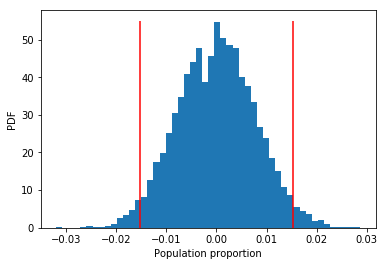

Margin of error:  0.015
95 % confidence interval:  [-0.01519509  0.01519505]
P-value:  0.0


In [174]:
# Your solution to Q3 here
np.random.seed(SEED)

w_calls = np.array(w['call'])
b_calls = np.array(b['call'])

p_w = (sum(w_calls) / len(w_calls))
p_b = (sum(b_calls) / len(b_calls))
empirical_diff = p_w - p_b

calls_concat = np.concatenate((w_calls, b_calls))

w_calls_shifted = w_calls + (np.mean(calls_concat) - np.mean(w_calls))
b_calls_shifted = b_calls + (np.mean(calls_concat) - np.mean(b_calls))

def draw_bs_samples(data, func, size = 1):
    sample_size = len(data)
    replicates = np.empty(size)
    
    for i in range(size):
        sample = np.random.choice(data, sample_size)
        replicates[i] = func(sample)

    return replicates
    
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1.0, len(data) + 1.0) / len(data)
    
    return x, y
    
w_replicates = draw_bs_samples(w_calls_shifted, np.mean, 10000)
b_replicates = draw_bs_samples(b_calls_shifted, np.mean, 10000)

replicates = w_replicates - b_replicates
x, y = ecdf(replicates)

# margin of error = critical value * standard error of the statistic (i.e. proportion)
margin_bs = 1.96 * np.std(replicates)

# 95% confidence interval = the window in which the 2.5th to 97.5th percentile of bootsrap sample proportions lie
confidence_interval_bs = np.percentile(replicates, [2.5, 97.5])

# p-value = probability that a simulated bootstrap sample has a sample proportion whose magnitude is greater
# than or equal to the empirical difference
p_val_bs = sum(abs(replicates) >= empirical_diff) / len(replicates)

_ = plt.hist(replicates, density = True, bins = 50)
_ = plt.vlines(confidence_interval_bs[0], 0, 55, colors = 'red')
_ = plt.vlines(confidence_interval_bs[1], 0, 55, colors = 'red')

_ = plt.xlabel('Population proportion')
_ = plt.ylabel('PDF')
_ = plt.show()

print('Margin of error: ', round(margin_bs, 3))
print('95 % confidence interval: ', confidence_interval_bs)
print('P-value: ', round(p_val_bs, 3))

#### Frequentist Statistical Approach

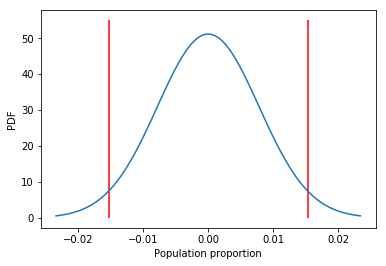

Margin of error:  0.015
95 % confidence interval:  [-0.01528191  0.01528191]
P-value:  0.0


In [175]:
#proportion of the difference & standard error of the difference
p_diff = p_w - p_b
p_avg = (p_w + p_b) / 2
std_diff = np.sqrt(2 * p_avg * (1 - p_avg) / len(w_calls))
z_score = (p_diff - 0) / std_diff

# Margin of error = critical value * standard error of the statistic (i.e. proportion)
margin_freq = 1.96 * std_diff

# Confidence interval = mean +/- margin of error
confidence_interval_freq = np.array([-1, +1]) * margin_freq

# P-value = probability that a sample will have a proportion whose magnitude is greater than or equal to the z-score
p_val_freq = stats.norm.sf(z_score) * 2

mean = 0
x = np.linspace(mean - 3*std_diff, mean + 3*std_diff, 100)
_ = plt.plot(x, stats.norm.pdf(x, mean, std_diff))
_ = plt.vlines(confidence_interval_freq[0], 0, 55, colors = 'red')
_ = plt.vlines(confidence_interval_freq[1], 0, 55, colors = 'red')

_ = plt.xlabel('Population proportion')
_ = plt.ylabel('PDF')
_ = plt.show()

print('Margin of error: ', round(margin_freq, 3))
print('95 % confidence interval: ', confidence_interval_freq)
print('P-value: ', round(p_val_freq, 3))

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

### 4. Write a story describing the statistical significance in the context or the original problem.
We performed hypothesis tests using both the bootstrap method as well as the frequentists statistical method under the null hypothesis that the population proportions of resumes labeled 'w' and those labeled 'b' are equal. In other words: $p_w - p_b = 0$. However, we see that the probability of the observed $\overline{p}_w - \overline{p}_b (= 0.032)$ occurring under this assumption is nearly 0. Therefor, we are confident in rejecting our null hypothesis and conclude that there is a significant difference in resumes recieving callbacks based on race.

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
We cannot conclude that race/name is the most important factor in callback success, only that it is one of the factors affecting callback success. We have not tested the significance of other factors and in order to amend this, we would have to perform similar tests for other features as well. We could also fit a logistic regression model to this data with the independent variable being callback result and the other features as dependent variables and evaluate the significance of each dependent variable.
